In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



# **EDA**:

In [188]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [189]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [190]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [191]:
pd.to_numeric(df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce').fillna(0)

In [ ]:
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})

/var/folders/j8/kgdpt2fn1yv1g6y4cj63y4c00000gn/T/ipykernel_14318/3615912532.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({'No':0,'Yes':1})


In [ ]:
categorical=df.select_dtypes(include='object').columns.to_list()
categorical

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
numerical=df.select_dtypes(include=['float64','int64']).columns.tolist()
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [ ]:
global_avg_churn=df['Churn'].mean()
print(f"the global average churn is:{global_avg_churn}")

the global average churn is:0.2653698707936959


In [ ]:
categorical.remove('customerID')

In [ ]:
for col in categorical:
    df_group=df.groupby(col).agg(mean=('Churn','mean'))
    df_group['risk']=df_group['mean']/global_avg_churn
    df_group['diff']=df_group['mean']-global_avg_churn
    print(df_group)

            mean      risk      diff
gender                              
Female  0.269209  1.014466  0.003839
Male    0.261603  0.985807 -0.003766
             mean      risk      diff
Partner                              
No       0.329580  1.241964  0.064210
Yes      0.196649  0.741038 -0.068721
                mean      risk      diff
Dependents                              
No          0.312791  1.178700  0.047422
Yes         0.154502  0.582215 -0.110868
                  mean      risk      diff
PhoneService                              
No            0.249267  0.939319 -0.016103
Yes           0.267096  1.006506  0.001726
                      mean      risk      diff
MultipleLines                                 
No                0.250442  0.943749 -0.014927
No phone service  0.249267  0.939319 -0.016103
Yes               0.286099  1.078114  0.020729
                     mean      risk      diff
InternetService                              
DSL              0.189591  0.714441 -

In [ ]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"len train:{len(X_train)}")
print(f"len test:{len(X_test)}")

len train:5634
len test:1409


In [ ]:
train_dict=X_train.to_dict(orient='records')
train_dict[0]


{'customerID': '4223-BKEOR',
 'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'No',
 'Dependents': 'Yes',
 'tenure': 21,
 'PhoneService': 'Yes',
 'MultipleLines': 'No',
 'InternetService': 'DSL',
 'OnlineSecurity': 'Yes',
 'OnlineBackup': 'No',
 'DeviceProtection': 'Yes',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'Yes',
 'Contract': 'One year',
 'PaperlessBilling': 'No',
 'PaymentMethod': 'Mailed check',
 'MonthlyCharges': 64.85,
 'TotalCharges': 1336.8}

In [ ]:
test_dict=X_test.to_dict(orient='records')
test_dict[0]


{'customerID': '1024-GUALD',
 'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'No',
 'tenure': 1,
 'PhoneService': 'No',
 'MultipleLines': 'No phone service',
 'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'No',
 'DeviceProtection': 'No',
 'TechSupport': 'No',
 'StreamingTV': 'No',
 'StreamingMovies': 'No',
 'Contract': 'Month-to-month',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Electronic check',
 'MonthlyCharges': 24.8,
 'TotalCharges': 24.8}

In [ ]:
dv=DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train_encoded=dv.transform(train_dict)
X_test_encoded=dv.transform(test_dict)

In [ ]:
print(dv.feature_names_)

['Contract=Month-to-month', 'Contract=One year', 'Contract=Two year', 'Dependents=No', 'Dependents=Yes', 'DeviceProtection=No', 'DeviceProtection=No internet service', 'DeviceProtection=Yes', 'InternetService=DSL', 'InternetService=Fiber optic', 'InternetService=No', 'MonthlyCharges', 'MultipleLines=No', 'MultipleLines=No phone service', 'MultipleLines=Yes', 'OnlineBackup=No', 'OnlineBackup=No internet service', 'OnlineBackup=Yes', 'OnlineSecurity=No', 'OnlineSecurity=No internet service', 'OnlineSecurity=Yes', 'PaperlessBilling=No', 'PaperlessBilling=Yes', 'Partner=No', 'Partner=Yes', 'PaymentMethod=Bank transfer (automatic)', 'PaymentMethod=Credit card (automatic)', 'PaymentMethod=Electronic check', 'PaymentMethod=Mailed check', 'PhoneService=No', 'PhoneService=Yes', 'SeniorCitizen', 'StreamingMovies=No', 'StreamingMovies=No internet service', 'StreamingMovies=Yes', 'StreamingTV=No', 'StreamingTV=No internet service', 'StreamingTV=Yes', 'TechSupport=No', 'TechSupport=No internet serv

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
model=LogisticRegression()
model.fit(X_train_encoded,y_train)

/opt/anaconda3/envs/datas/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test_encoded)
print(y_pred)

[1 0 0 ... 0 0 1]


- **accuracy**: fraction of correct predictions

1400 customers -> assign a pred 0.5 0.4 0.3

if >0.5 churn

if <0.5 not going to churn

some of the decisions were correct some not correct!

<Axes: >

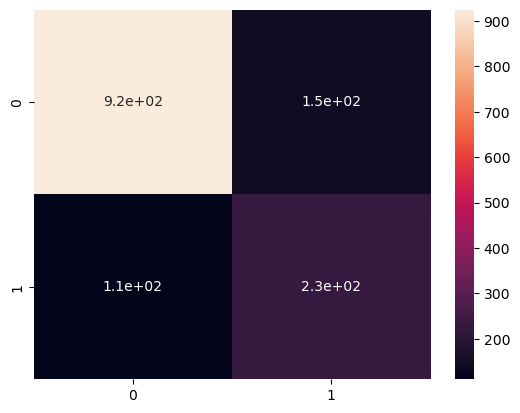

In [ ]:
cf=confusion_matrix(y_pred,y_test)

sns.heatmap(cf,annot=True)

- **recall**:did i recall the actual trues(remember/retrieval)?how many do i predict?
<br/>
- **precision**:when i predict yes is right?
<br/>
- “Precision is about being right,
Recall is about not missing,
Accuracy is about the overall picture.”

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"recall score:{recall:.2f}")
print(f"precision score:{precision:.2f}")
print(f"f1 score is:{f1:.2f}")

recall score:0.61
precision score:0.67
f1 score is:0.64


**ROC and AUC curves**

In [ ]:
y_pred_proba=model.predict_proba(X_test_encoded)[:,1]

In [ ]:
fpr,tpr,tresholds=roc_curve(y_test,y_pred_proba)
print(fpr[:5])
print(tpr[:5])
print(tresholds[:5])

[0.         0.         0.         0.00096525 0.00096525]
[0.         0.00268097 0.0080429  0.0080429  0.03753351]
[       inf 0.82238862 0.81800019 0.80854486 0.77048587]


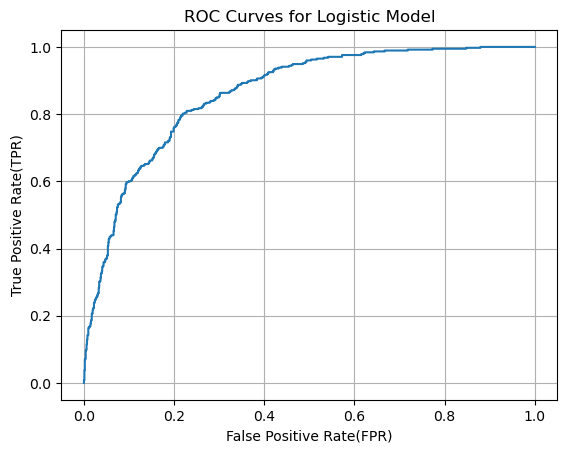

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curves for Logistic Model')
plt.grid(True)
plt.show()


In [ ]:
print(f"AUC_logistic_model:{roc_auc_score(y_test, y_pred_proba):.2f}")

AUC_logistic_model:0.86


* AUC interpretation:p(randomly selected positive example>randomly selected example)




* AUC measures how often your model ranks a random positive higher than a random negative.


Your model outputs a score or probability for each sample — how likely it thinks that sample belongs to the positive class.

If your model is good, then:

Positive examples should usually have higher scores

Negative examples should have lower scores

So we can “test” your model by comparing all positive–negative pairs and counting how often it ranks them correctly.

# **Loading the Dataset:**

In [ ]:
def preprocess(df):
    df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce').fillna(0)
    df['Churn']=df['Churn'].map({'No': 0, 'Yes': 1}).astype(int)
    categorical=df.select_dtypes(include='object').columns.to_list()
    categorical.remove('customerID')
    numerical=df.select_dtypes(include=['float64','int64']).columns.tolist()
    df=df[categorical+numerical]
    X=df.drop('Churn',axis=1)
    y=df['Churn']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    
    return X_train,y_train,X_test,y_test

In [ ]:
df=pd.read_csv("Telco-Customer-Churn.csv")
X_train,y_train,X_test,y_test=preprocess(df)

#  **1. manual implementation**

In [ ]:
def one_hot_encoding(X):
    dv=DictVectorizer(sparse=False)
    train_dict=X.to_dict(orient='records')
    X_encoded=dv.fit_transform(train_dict)
   
    return dv,X_encoded

In [ ]:
def predict(X_train,y_train,X_test,dv,C,max_iter,solver):
    scaler=StandardScaler()
    model=LogisticRegression(max_iter=max_iter,solver=solver,C=C)
    X_train=scaler.fit_transform(X_train)
    model.fit(X_train,y_train)
    X_test_encoded=dv.transform(X_test.to_dict(orient='records'))
    X_test_encoded=scaler.transform(X_test_encoded)
    y_pred=model.predict_proba(X_test_encoded)[:,1]
    return y_pred


In [ ]:
from itertools import product
kfold=KFold(n_splits=10,shuffle=True,random_state=1)
scores=[]
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 2000],
    'solver': ['lbfgs', 'liblinear']
}
params=[]
i=0
for C,max_iter,solver in product(param_grid['C'],param_grid['max_iter'],param_grid['solver']):
   for train_idx,val_idx in kfold.split(X_train,y_train):
    print(f"fold{i}")
    X_train_1,y_train_1=X_train.iloc[train_idx],y_train.iloc[train_idx]
    X_val,y_val=X_train.iloc[val_idx],y_train.iloc[val_idx]
    dv,X_train_encoded=one_hot_encoding(X_train_1)
    y_pred=predict(X_train_encoded,y_train_1,X_val,dv,C,max_iter,solver)
    AUC=roc_auc_score(y_val,y_pred)
    print(f"AUC score:{AUC}")
    scores.append(AUC)
    params.append({'C': C, 'max_iter': max_iter, 'solver': solver})
    i+=1
   

best_value=np.argmax(scores)
best_params=params[best_value]
print(f"best fold is :{best_value}")
print(f"best params:{best_params}")
    

fold0
AUC score:0.8041791937278875
fold1
AUC score:0.8603202145279596
fold2
AUC score:0.8385346215780999
fold3
AUC score:0.8523958509933265
fold4
AUC score:0.8495120448724183
fold5
AUC score:0.8174390082206311
fold6
AUC score:0.8562389023405973
fold7
AUC score:0.8360081704114386
fold8
AUC score:0.8398695898695899
fold9
AUC score:0.8207038143070449
fold10
AUC score:0.8044449612145573
fold11
AUC score:0.859436864106002
fold12
AUC score:0.8381642512077294
fold13
AUC score:0.850731316369465
fold14
AUC score:0.8485555879778233
fold15
AUC score:0.817024661893397
fold16
AUC score:0.8557223567393059
fold17
AUC score:0.8357325811367247
fold18
AUC score:0.8401530901530901
fold19
AUC score:0.8203644631464639
fold20
AUC score:0.8041791937278875
fold21
AUC score:0.8603202145279596
fold22
AUC score:0.8385346215780999
fold23
AUC score:0.8523958509933265
fold24
AUC score:0.8495120448724183
fold25
AUC score:0.8174390082206311
fold26
AUC score:0.8562389023405973
fold27
AUC score:0.8360081704114386
fold2

#  **2. GridSearchCV implementation**

In [ ]:
pipeline=Pipeline(
    [
        ('dv',DictVectorizer(sparse=False)),
        ('scaler',StandardScaler()),
        ('clf',LogisticRegression())
    ]
)
param_grid={
    'clf__C':[0.01, 0.1, 1, 10],
    'clf__max_iter':[500, 1000, 2000],
    'clf__solver':['lbfgs', 'liblinear']
}
kf=KFold(n_splits=10,shuffle=True,random_state=1)
grid_search=GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring='roc_auc'
)

In [ ]:
grid_search.fit(X_train.to_dict(orient='records'), y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('dv', DictVectorizer(sparse=False)),
                                       ('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__max_iter': [500, 1000, 2000],
                         'clf__solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc')

In [ ]:
print(f"best AUC score:{grid_search.best_score_:.2f}")

best AUC score:0.84


In [ ]:
best_model=grid_search.best_estimator_
X_test_dict = X_test.to_dict(orient='records')
y_pred = best_model.predict_proba(X_test_dict)[:, 1] 
test_auc = roc_auc_score(y_test, y_pred)
print(f"Test AUC:{test_auc:.2f}")

Test AUC:0.86


# **3.Random search implementation**

In [ ]:
from scipy.stats import loguniform,randint

param_dist={
    'clf__C':loguniform(0.01,10),
    'clf__solver':['lbfgs','liblinear'],
    'clf__max_iter': randint(500, 2001),
}

In [ ]:
random_search=RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42
)

In [ ]:
random_search.fit(X_train.to_dict(orient='records'),y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('dv',
                                              DictVectorizer(sparse=False)),
                                             ('scaler', StandardScaler()),
                                             ('clf', LogisticRegression())]),
                   n_iter=20,
                   param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17ae72c90>,
                                        'clf__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17ae70200>,
                                        'clf__solver': ['lbfgs', 'liblinear']},
                   random_state=42, scoring='roc_auc')

In [ ]:
print(random_search.best_score_)

0.8410948051099852


In [ ]:
best_model=random_search.best_estimator_
y_pred=best_model.predict_proba(X_test.to_dict(orient='records'))[:,1]
print(f"test AUC score:{roc_auc_score(y_test,y_pred)}")

test AUC score:0.8618513668781764


In [ ]:
import mlflow
import mlflow.sklearn

In [ ]:
mlflow.set_experiment("Churn_prediction_random_search")
with mlflow.start_run():
    input_example = X_train.to_dict(orient='records')[0:1]
    mlflow.log_param("train_dataset",X_train)
    mlflow.log_param("test dataset",X_test)
    random_search.fit(X_train.to_dict(orient='records'),y_train)
    mlflow.log_params(random_search.best_params_)
    mlflow.log_metric("best_cv_auc", random_search.best_score_)
    mlflow.sklearn.log_model(random_search.best_estimator_,"model")
    X_test_dict = X_test.to_dict(orient='records')
    y_test_pred_prob = random_search.predict_proba(X_test_dict)[:, 1]
    test_auc = roc_auc_score(y_test, y_test_pred_prob)
    mlflow.log_metric("test_auc", test_auc)
   
    print("Best params:", random_search.best_params_)
    print("Best CV AUC:", random_search.best_score_)
    print("Test AUC:", test_auc)
    mlflow.sklearn.log_model(
    sk_model=random_search.best_estimator_,
    name="model_logistic",
    input_example=input_example
)



2025/11/06 13:19:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 13:19:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handli

Best params: {'clf__C': 6.541210527692731, 'clf__max_iter': 885, 'clf__solver': 'liblinear'}
Best CV AUC: 0.8410948051099852
Test AUC: 0.8618513668781764


2025/11/06 13:19:20 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    {
      "gender": "Female",
  .... Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: iteration over a 0-d array


# **3.Decison trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer


In [ ]:
pipeline_tree=Pipeline([
    ('dv',DictVectorizer(sparse=False)),
    ('clf',DecisionTreeClassifier(random_state=42))
] 
)

In [ ]:
param_dist={
    'clf__criterion':['gini','entropy'],
    'clf__max_depth':randint(1,20),
    'clf__min_samples_split':randint(2,20),
    'clf__min_samples_leaf':randint(1,20)
}

In [ ]:
random_search_tree=RandomizedSearchCV(
    pipeline_tree,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    random_state=42

)

In [ ]:
random_search_tree.fit(X_train.to_dict(orient='records'),y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('dv',
                                              DictVectorizer(sparse=False)),
                                             ('clf',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100,
                   param_distributions={'clf__criterion': ['gini', 'entropy'],
                                        'clf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306a710a0>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306a71d60>,
                                        'clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306a71ca0>},
                   random_state=42, scoring='roc_auc')

In [ ]:
best_score=random_search_tree.best_score_
print(f"best AUC score is:{best_score:.2f}")

best AUC score is:0.83


In [ ]:
best_model_tree=random_search_tree.best_estimator_
y_pred_tree=best_model_tree.predict_proba(X_test.to_dict(orient='records'))[:,1]
test_score_tree=roc_auc_score(y_test,y_pred_tree)

In [ ]:
print(f" test AUC score: {test_score_tree:.2f}")

 test AUC score: 0.84


# **4.Ensemble methods:Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline_rf=Pipeline(
    [
        ('dv',DictVectorizer()),
        ('clf',RandomForestClassifier(n_estimators=10))
    ]
)

In [ ]:
param_dist_rf={
    'clf__n_estimators':randint(10,200),
    'clf__max_features':randint(1,20),
    'clf__bootstrap':randint(1,20)
}

random_search_rf=RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    random_state=42

)

In [ ]:
random_search_rf.fit(X_train.to_dict(orient='records'),y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('dv', DictVectorizer()),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=100,
                   param_distributions={'clf__criterion': ['gini', 'entropy'],
                                        'clf__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306a710a0>,
                                        'clf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306a71d60>,
                                        'clf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x306a71ca0>},
                   random_state=42, scoring='roc_auc')

In [ ]:
print(random_search_rf.best_params_)

{'clf__criterion': 'entropy', 'clf__max_depth': 14, 'clf__min_samples_leaf': 12, 'clf__min_samples_split': 16}


In [ ]:
model_rf=random_search_rf.best_estimator_

In [ ]:
y_pred_rf=model_rf.predict_proba(X_test.to_dict(orient='records'))[:,1]
test_score_tree=roc_auc_score(y_test,y_pred_rf)
print(f" test AUC score: {test_score_tree:.2f}")

 test AUC score: 0.86


In [ ]:
with mlflow.start_run():
    random_search_rf.fit(X_train.to_dict(orient='records'),y_train)
    mlflow.log_params(random_search_rf.best_params_)
    y_pred_rf=model_rf.predict_proba(X_test.to_dict(orient='records'))[:,1]
    test_score_tree=roc_auc_score(y_test,y_pred_rf)
    mlflow.log_metric("test_auc",test_score_tree)
    mlflow.sklearn.log_model(model_rf, "random_forest_model")

    

2025/11/06 21:57:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/06 21:57:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# **5.Gradient Boosting**

In [ ]:
import xgboost as xgb
import mlflow
import optuna
from xgboost import XGBClassifier


In [ ]:
def get_or_create_experiment(experiment_name):

  if experiment := mlflow.get_experiment_by_name(experiment_name):
      return experiment.experiment_id
  else:
      return mlflow.create_experiment(experiment_name)

In [ ]:
experiment_id=get_or_create_experiment("Churn_prediction_random_search")
mlflow.set_experiment(experiment_id=experiment_id)


<Experiment: artifact_location='file:///Users/ayalemzouri/Desktop/Extraculicular/projects/classification_pojects/telco_churn_project/mlruns/630187848356914146', creation_time=1762430934529, experiment_id='630187848356914146', last_update_time=1762430934529, lifecycle_stage='active', name='Churn_prediction_random_search', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [ ]:
df=pd.read_csv("Telco-Customer-Churn.csv")
X_train,y_train,X_test,y_test=preprocess(df)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42)
dv=DictVectorizer()
X_encoded=dv.fit_transform(X_train.to_dict(orient='records'))
X_val_encoded=dv.transform(X_val.to_dict(orient='records'))
X_test_encoded=dv.transform(X_test.to_dict(orient='records'))
features=dv.get_feature_names_out().tolist()
print(f"features :{features}")
train_m=xgb.DMatrix(X_encoded,label=y_train,feature_names=features)
dval=xgb.DMatrix(X_val_encoded,label=y_val,feature_names=features)
test_m=xgb.DMatrix(X_test_encoded,label=y_test,feature_names=features)

features :['Contract=Month-to-month', 'Contract=One year', 'Contract=Two year', 'Dependents=No', 'Dependents=Yes', 'DeviceProtection=No', 'DeviceProtection=No internet service', 'DeviceProtection=Yes', 'InternetService=DSL', 'InternetService=Fiber optic', 'InternetService=No', 'MonthlyCharges', 'MultipleLines=No', 'MultipleLines=No phone service', 'MultipleLines=Yes', 'OnlineBackup=No', 'OnlineBackup=No internet service', 'OnlineBackup=Yes', 'OnlineSecurity=No', 'OnlineSecurity=No internet service', 'OnlineSecurity=Yes', 'PaperlessBilling=No', 'PaperlessBilling=Yes', 'Partner=No', 'Partner=Yes', 'PaymentMethod=Bank transfer (automatic)', 'PaymentMethod=Credit card (automatic)', 'PaymentMethod=Electronic check', 'PaymentMethod=Mailed check', 'PhoneService=No', 'PhoneService=Yes', 'SeniorCitizen', 'StreamingMovies=No', 'StreamingMovies=No internet service', 'StreamingMovies=Yes', 'StreamingTV=No', 'StreamingTV=No internet service', 'StreamingTV=Yes', 'TechSupport=No', 'TechSupport=No int

In [ ]:
import mlflow.xgboost


def objective(trial):
        params={
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'booster':trial.suggest_categorical("booster",["gbtree","dart","gblinear"]),
            "lambda":trial.suggest_float("lambda",1e-8,1,log=True),
            "alpha":trial.suggest_float("alpha",1e-8,1.0,log=True)
        }
        if params["booster"]=="gbtree" or params["booster"]=="dart":
            params["max_depth"]=trial.suggest_int("max_depth",1,9)
            params["eta"]=trial.suggest_float("eta",1e-8,1.0,log=True)
            params["gamma"]=trial.suggest_float("gamma",1e-8,1,log=True)
            params["grow_policy"]=trial.suggest_categorical("grow_policy",["depthwise","lossguide"])
        with mlflow.start_run(nested=True,run_name=f"Trial_{trial.number}_{params['booster']}_maxdepth{params.get('max_depth','NA')}"):
    
          bst=xgb.train(params,train_m,evals=[(dval,"validation")])
          y_pred_rf=bst.predict(dval)
          auc=roc_auc_score(y_val,y_pred_rf)
          mlflow.log_params(params)
          mlflow.log_metric("test_auc",auc)
          mlflow.xgboost.log_model(bst,artifact_path="xgb_model")
        return auc




In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2025-11-07 08:32:01,045] A new study created in memory with name: no-name-0fd22ca9-3509-4296-9190-72ad6f0c949f


[0]	validation-auc:0.71412
[1]	validation-auc:0.71412
[2]	validation-auc:0.71412
[3]	validation-auc:0.71412
[4]	validation-auc:0.71412
[5]	validation-auc:0.71412
[6]	validation-auc:0.71412
[7]	validation-auc:0.71412
[8]	validation-auc:0.71412
[9]	validation-auc:0.71412


2025/11/07 08:32:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:01] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:02,904] Trial 0 finished with value: 0.7141224991674565 and parameters: {'booster': 'dart', 'lambda': 8.516540012448789e-06, 'alpha': 1.0119767529015802e-07, 'max_depth': 1, 'eta': 0.00025992003293127936, 'gamma': 3.7163235098012635e-06, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.7141224991674565.


[0]	validation-auc:0.79249
[1]	validation-auc:0.81067
[2]	validation-auc:0.81067
[3]	validation-auc:0.81067
[4]	validation-auc:0.81067
[5]	validation-auc:0.81067
[6]	validation-auc:0.81067
[7]	validation-auc:0.81067
[8]	validation-auc:0.81067
[9]	validation-auc:0.81067


2025/11/07 08:32:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:02] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:04,032] Trial 1 finished with value: 0.8106744883059661 and parameters: {'booster': 'gbtree', 'lambda': 0.003328559199485406, 'alpha': 0.000366959632452219, 'max_depth': 5, 'eta': 2.8282202112993884e-07, 'gamma': 1.6623299098067088e-08, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8106744883059661.


[0]	validation-auc:0.78354
[1]	validation-auc:0.78615
[2]	validation-auc:0.78745
[3]	validation-auc:0.78705
[4]	validation-auc:0.78736
[5]	validation-auc:0.78730
[6]	validation-auc:0.78728
[7]	validation-auc:0.78747
[8]	validation-auc:0.78732
[9]	validation-auc:0.78718


2025/11/07 08:32:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:04] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:05,166] Trial 2 finished with value: 0.7871788303404463 and parameters: {'booster': 'dart', 'lambda': 1.4114295437088282e-06, 'alpha': 1.1626012093672811e-07, 'max_depth': 9, 'eta': 4.0500129922005015e-07, 'gamma': 2.9656141228058265e-05, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8106744883059661.


[0]	validation-auc:0.82194
[1]	validation-auc:0.82784
[2]	validation-auc:0.83059
[3]	validation-auc:0.83186
[4]	validation-auc:0.83372
[5]	validation-auc:0.83304
[6]	validation-auc:0.83355
[7]	validation-auc:0.83359
[8]	validation-auc:0.83391
[9]	validation-auc:0.83340


2025/11/07 08:32:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:05] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:06,328] Trial 3 finished with value: 0.8334016445935908 and parameters: {'booster': 'gblinear', 'lambda': 0.010726728806183704, 'alpha': 4.592999484840028e-05}. Best is trial 3 with value: 0.8334016445935908.


[0]	validation-auc:0.80207
[1]	validation-auc:0.80116
[2]	validation-auc:0.80149
[3]	validation-auc:0.80117
[4]	validation-auc:0.80139
[5]	validation-auc:0.80117
[6]	validation-auc:0.80141
[7]	validation-auc:0.80117
[8]	validation-auc:0.80141
[9]	validation-auc:0.80117


2025/11/07 08:32:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:06] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:07,467] Trial 4 finished with value: 0.8011732458949201 and parameters: {'booster': 'dart', 'lambda': 4.631287461829896e-08, 'alpha': 0.005017952671153649, 'max_depth': 7, 'eta': 7.756963764068142e-07, 'gamma': 1.0160070968221674e-08, 'grow_policy': 'depthwise'}. Best is trial 3 with value: 0.8334016445935908.


[0]	validation-auc:0.81569
[1]	validation-auc:0.82419
[2]	validation-auc:0.82465
[3]	validation-auc:0.82514
[4]	validation-auc:0.82621
[5]	validation-auc:0.82656
[6]	validation-auc:0.82519
[7]	validation-auc:0.82554
[8]	validation-auc:0.82683
[9]	validation-auc:0.82584


2025/11/07 08:32:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:07] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:08,657] Trial 5 finished with value: 0.8258434305914902 and parameters: {'booster': 'gbtree', 'lambda': 3.7171279733276524e-08, 'alpha': 0.003317775735833755, 'max_depth': 5, 'eta': 0.033261265285023635, 'gamma': 1.4861840887638135e-05, 'grow_policy': 'lossguide'}. Best is trial 3 with value: 0.8334016445935908.


[0]	validation-auc:0.82409
[1]	validation-auc:0.82795
[2]	validation-auc:0.83080
[3]	validation-auc:0.83198
[4]	validation-auc:0.83270
[5]	validation-auc:0.83273
[6]	validation-auc:0.83349
[7]	validation-auc:0.83371
[8]	validation-auc:0.83394
[9]	validation-auc:0.83404


2025/11/07 08:32:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:08] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:09,756] Trial 6 finished with value: 0.8340395009862439 and parameters: {'booster': 'gblinear', 'lambda': 0.0002359001551661179, 'alpha': 0.0002857357401955881}. Best is trial 6 with value: 0.8340395009862439.


[0]	validation-auc:0.80946
[1]	validation-auc:0.80967
[2]	validation-auc:0.80967
[3]	validation-auc:0.80967
[4]	validation-auc:0.80967
[5]	validation-auc:0.80967
[6]	validation-auc:0.80967
[7]	validation-auc:0.80967
[8]	validation-auc:0.80967
[9]	validation-auc:0.80967


2025/11/07 08:32:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:09] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:10,913] Trial 7 finished with value: 0.8096728744524424 and parameters: {'booster': 'dart', 'lambda': 0.014858057940678042, 'alpha': 0.0001044830534803612, 'max_depth': 6, 'eta': 8.849451484475158e-06, 'gamma': 3.7256826400001725e-08, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.8340395009862439.


[0]	validation-auc:0.80565
[1]	validation-auc:0.80565
[2]	validation-auc:0.80565
[3]	validation-auc:0.80565
[4]	validation-auc:0.80565
[5]	validation-auc:0.80565
[6]	validation-auc:0.80565
[7]	validation-auc:0.80565
[8]	validation-auc:0.80565
[9]	validation-auc:0.80908


2025/11/07 08:32:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:10] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:12,020] Trial 8 finished with value: 0.8090849706688525 and parameters: {'booster': 'gbtree', 'lambda': 1.920943939622917e-05, 'alpha': 5.237940697932535e-07, 'max_depth': 3, 'eta': 0.00041287054745159986, 'gamma': 7.211808509064155e-06, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.8340395009862439.


[0]	validation-auc:0.82171
[1]	validation-auc:0.82806
[2]	validation-auc:0.83096
[3]	validation-auc:0.83154
[4]	validation-auc:0.83293
[5]	validation-auc:0.83292
[6]	validation-auc:0.83331
[7]	validation-auc:0.83368
[8]	validation-auc:0.83388
[9]	validation-auc:0.83388


2025/11/07 08:32:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:12] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:13,116] Trial 9 finished with value: 0.833883238978405 and parameters: {'booster': 'gblinear', 'lambda': 0.00010975913363312959, 'alpha': 9.226777449765345e-06}. Best is trial 6 with value: 0.8340395009862439.


[0]	validation-auc:0.72552
[1]	validation-auc:0.74387
[2]	validation-auc:0.75639
[3]	validation-auc:0.75296
[4]	validation-auc:0.76079
[5]	validation-auc:0.76151
[6]	validation-auc:0.76685
[7]	validation-auc:0.76787
[8]	validation-auc:0.76882
[9]	validation-auc:0.77173


2025/11/07 08:32:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:14,253] Trial 10 finished with value: 0.771725542434101 and parameters: {'booster': 'gblinear', 'lambda': 0.34376217017006155, 'alpha': 0.1277862678233946}. Best is trial 6 with value: 0.8340395009862439.


[0]	validation-auc:0.82476
[1]	validation-auc:0.83072
[2]	validation-auc:0.83073
[3]	validation-auc:0.83223
[4]	validation-auc:0.83234
[5]	validation-auc:0.83303
[6]	validation-auc:0.83345
[7]	validation-auc:0.83352
[8]	validation-auc:0.83400
[9]	validation-auc:0.83418


2025/11/07 08:32:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:14] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:15,419] Trial 11 finished with value: 0.8341803929605246 and parameters: {'booster': 'gblinear', 'lambda': 0.0003570975360946531, 'alpha': 6.274060953647111e-06}. Best is trial 11 with value: 0.8341803929605246.


[0]	validation-auc:0.82040
[1]	validation-auc:0.82753
[2]	validation-auc:0.83036
[3]	validation-auc:0.83208
[4]	validation-auc:0.83281
[5]	validation-auc:0.83321
[6]	validation-auc:0.83326
[7]	validation-auc:0.83354
[8]	validation-auc:0.83398
[9]	validation-auc:0.83415


2025/11/07 08:32:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:15] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:16,533] Trial 12 finished with value: 0.8341522145656686 and parameters: {'booster': 'gblinear', 'lambda': 0.0005145167447041954, 'alpha': 3.2729499063031955e-06}. Best is trial 11 with value: 0.8341803929605246.


[0]	validation-auc:0.82298
[1]	validation-auc:0.82731
[2]	validation-auc:0.82992
[3]	validation-auc:0.83125
[4]	validation-auc:0.83213
[5]	validation-auc:0.83269
[6]	validation-auc:0.83352
[7]	validation-auc:0.83383
[8]	validation-auc:0.83406
[9]	validation-auc:0.83447


2025/11/07 08:32:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:16] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:17,657] Trial 13 finished with value: 0.8344698619258651 and parameters: {'booster': 'gblinear', 'lambda': 0.0008032800731077418, 'alpha': 2.5784390679290415e-06}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.80241
[1]	validation-auc:0.80191
[2]	validation-auc:0.79772
[3]	validation-auc:0.79586
[4]	validation-auc:0.79673
[5]	validation-auc:0.79629
[6]	validation-auc:0.79501
[7]	validation-auc:0.79504
[8]	validation-auc:0.79518
[9]	validation-auc:0.79526


2025/11/07 08:32:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:18,821] Trial 14 finished with value: 0.7952634679919052 and parameters: {'booster': 'gblinear', 'lambda': 0.6461294721444875, 'alpha': 2.3764698188780577e-06}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82258
[1]	validation-auc:0.82930
[2]	validation-auc:0.83155
[3]	validation-auc:0.83253
[4]	validation-auc:0.83341
[5]	validation-auc:0.83346
[6]	validation-auc:0.83405
[7]	validation-auc:0.83408
[8]	validation-auc:0.83418
[9]	validation-auc:0.83413


2025/11/07 08:32:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:18] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:19,973] Trial 15 finished with value: 0.8341291595153316 and parameters: {'booster': 'gblinear', 'lambda': 0.002049406943808688, 'alpha': 1.5055431882198268e-08}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82314
[1]	validation-auc:0.82749
[2]	validation-auc:0.82964
[3]	validation-auc:0.83118
[4]	validation-auc:0.83224
[5]	validation-auc:0.83334
[6]	validation-auc:0.83309
[7]	validation-auc:0.83362
[8]	validation-auc:0.83380
[9]	validation-auc:0.83408


2025/11/07 08:32:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:19] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:21,093] Trial 16 finished with value: 0.8340779260701386 and parameters: {'booster': 'gblinear', 'lambda': 2.6492129779649356e-06, 'alpha': 1.8406922908754695e-05}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82163
[1]	validation-auc:0.82585
[2]	validation-auc:0.82780
[3]	validation-auc:0.82896
[4]	validation-auc:0.82879
[5]	validation-auc:0.82816
[6]	validation-auc:0.82733
[7]	validation-auc:0.82729
[8]	validation-auc:0.82764
[9]	validation-auc:0.82732


2025/11/07 08:32:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:21] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:22,264] Trial 17 finished with value: 0.827320234649179 and parameters: {'booster': 'gblinear', 'lambda': 0.056628853567586304, 'alpha': 4.4371526198115116e-07}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82043
[1]	validation-auc:0.82843
[2]	validation-auc:0.83187
[3]	validation-auc:0.83286
[4]	validation-auc:0.83264
[5]	validation-auc:0.83318
[6]	validation-auc:0.83331
[7]	validation-auc:0.83350
[8]	validation-auc:0.83379
[9]	validation-auc:0.83392


2025/11/07 08:32:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:22] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:23,367] Trial 18 finished with value: 0.8339165407177805 and parameters: {'booster': 'gblinear', 'lambda': 3.4526191210035e-07, 'alpha': 2.3910654679582435e-08}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.71412
[1]	validation-auc:0.71412
[2]	validation-auc:0.77623
[3]	validation-auc:0.77623
[4]	validation-auc:0.80382
[5]	validation-auc:0.80616
[6]	validation-auc:0.81406
[7]	validation-auc:0.81664
[8]	validation-auc:0.82165
[9]	validation-auc:0.82662


2025/11/07 08:32:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:23] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:24,516] Trial 19 finished with value: 0.8266157747777749 and parameters: {'booster': 'gbtree', 'lambda': 3.389942087235208e-05, 'alpha': 0.002857003040950766, 'max_depth': 1, 'eta': 0.2263667813890577, 'gamma': 0.14258493826191976, 'grow_policy': 'lossguide'}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.73537
[1]	validation-auc:0.73878
[2]	validation-auc:0.74691
[3]	validation-auc:0.75005
[4]	validation-auc:0.75438
[5]	validation-auc:0.75965
[6]	validation-auc:0.76078
[7]	validation-auc:0.76359
[8]	validation-auc:0.76424
[9]	validation-auc:0.76714


2025/11/07 08:32:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:24] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:25,628] Trial 20 finished with value: 0.7671375874170658 and parameters: {'booster': 'gblinear', 'lambda': 0.0014901538293166565, 'alpha': 0.5345303892681551}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82111
[1]	validation-auc:0.82794
[2]	validation-auc:0.83077
[3]	validation-auc:0.83263
[4]	validation-auc:0.83252
[5]	validation-auc:0.83330
[6]	validation-auc:0.83315
[7]	validation-auc:0.83374
[8]	validation-auc:0.83397
[9]	validation-auc:0.83419


2025/11/07 08:32:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:25] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:26,762] Trial 21 finished with value: 0.8341880779773034 and parameters: {'booster': 'gblinear', 'lambda': 0.0001643851321658794, 'alpha': 1.7549819592224254e-06}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82457
[1]	validation-auc:0.82944
[2]	validation-auc:0.83046
[3]	validation-auc:0.83161
[4]	validation-auc:0.83268
[5]	validation-auc:0.83321
[6]	validation-auc:0.83327
[7]	validation-auc:0.83357
[8]	validation-auc:0.83384
[9]	validation-auc:0.83397


2025/11/07 08:32:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:26] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:27,922] Trial 22 finished with value: 0.8339652124907139 and parameters: {'booster': 'gblinear', 'lambda': 0.000391565699412931, 'alpha': 2.0889244441303365e-06}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82137
[1]	validation-auc:0.82799
[2]	validation-auc:0.83123
[3]	validation-auc:0.83296
[4]	validation-auc:0.83328
[5]	validation-auc:0.83305
[6]	validation-auc:0.83310
[7]	validation-auc:0.83381
[8]	validation-auc:0.83362
[9]	validation-auc:0.83380


2025/11/07 08:32:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:27] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:29,088] Trial 23 finished with value: 0.8337987037938365 and parameters: {'booster': 'gblinear', 'lambda': 5.6125226773816836e-05, 'alpha': 3.9958405797125126e-07}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82073
[1]	validation-auc:0.82355
[2]	validation-auc:0.82499
[3]	validation-auc:0.82518
[4]	validation-auc:0.82529
[5]	validation-auc:0.82537
[6]	validation-auc:0.82400
[7]	validation-auc:0.82386
[8]	validation-auc:0.82374
[9]	validation-auc:0.82359


2025/11/07 08:32:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:29] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:30,192] Trial 24 finished with value: 0.8235853164946076 and parameters: {'booster': 'gblinear', 'lambda': 0.0928542620077127, 'alpha': 1.0664523908505905e-05}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82213
[1]	validation-auc:0.82882
[2]	validation-auc:0.83020
[3]	validation-auc:0.83172
[4]	validation-auc:0.83285
[5]	validation-auc:0.83310
[6]	validation-auc:0.83331
[7]	validation-auc:0.83339
[8]	validation-auc:0.83363
[9]	validation-auc:0.83410


2025/11/07 08:32:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:30] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:31,297] Trial 25 finished with value: 0.8340984194482157 and parameters: {'booster': 'gblinear', 'lambda': 0.0008469215965819403, 'alpha': 1.4773463505765944e-06}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82188
[1]	validation-auc:0.82556
[2]	validation-auc:0.82932
[3]	validation-auc:0.83138
[4]	validation-auc:0.83241
[5]	validation-auc:0.83274
[6]	validation-auc:0.83329
[7]	validation-auc:0.83355
[8]	validation-auc:0.83372
[9]	validation-auc:0.83413


2025/11/07 08:32:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:31] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:32,403] Trial 26 finished with value: 0.8341291595153317 and parameters: {'booster': 'gblinear', 'lambda': 0.00013332513320939523, 'alpha': 2.878998899841033e-05}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.82181
[1]	validation-auc:0.82741
[2]	validation-auc:0.83015
[3]	validation-auc:0.83195
[4]	validation-auc:0.83270
[5]	validation-auc:0.83321
[6]	validation-auc:0.83335
[7]	validation-auc:0.83370
[8]	validation-auc:0.83425
[9]	validation-auc:0.83423


2025/11/07 08:32:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:32] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:33,509] Trial 27 finished with value: 0.8342265030611984 and parameters: {'booster': 'gblinear', 'lambda': 0.006918849601662177, 'alpha': 8.939242203118564e-08}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.50000
[1]	validation-auc:0.60341
[2]	validation-auc:0.60341
[3]	validation-auc:0.60341
[4]	validation-auc:0.60341
[5]	validation-auc:0.60341
[6]	validation-auc:0.60341
[7]	validation-auc:0.60341
[8]	validation-auc:0.60341
[9]	validation-auc:0.60341


2025/11/07 08:32:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:34,835] Trial 28 finished with value: 0.6034108666137254 and parameters: {'booster': 'dart', 'lambda': 0.007499522862393131, 'alpha': 1.0509920492155837e-07, 'max_depth': 9, 'eta': 2.2547206116845382e-08, 'gamma': 0.2716604197693681, 'grow_policy': 'lossguide'}. Best is trial 13 with value: 0.8344698619258651.


[0]	validation-auc:0.80565
[1]	validation-auc:0.81078
[2]	validation-auc:0.80943
[3]	validation-auc:0.81078
[4]	validation-auc:0.81385
[5]	validation-auc:0.81078
[6]	validation-auc:0.81056
[7]	validation-auc:0.81078
[8]	validation-auc:0.81077
[9]	validation-auc:0.81078


2025/11/07 08:32:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/opt/anaconda3/envs/datas/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:169: UserWarning:

[08:32:34] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.

2025/11/07 08:32:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2025-11-07 08:32:36,034] Trial 29 finished with value: 0.8107756743602224 and parameters: {'booster': 'gbtree', 'lambda': 9.483896993222607e-06, 'alpha': 4.512453140499482e-08, 'max_depth': 3, 'eta': 0.005731911719739955, 'gamma': 0.004323362092068728, 'grow_policy': 'depthwise'}. Best is trial 13 with value: 0.8344698619258651.


In [ ]:
import optuna.visualization as vis
vis.plot_optimization_history(study)


In [ ]:
vis.plot_param_importances(study)

# **xgboost watchlist**

In [192]:
xgb_params={
    'eta':0.3,
    'max_depth':6,
    'eval_metric':'auc',
    'min_child_weight':1,
    'objective':'binary:logistic',
    'seed':1,
    'verbosity':1
}
watchlist=[(train_m,'train'),(test_m,'test')]

In [193]:
def parse_xgb_output(output):
    results=[]
    for line in output.stdout.strip().split("\n"):
        it_line,auc_train,auc_test=line.split("\t")
        it=int(it_line.strip('[]'))
        train=float(auc_train.split(":")[1])
        test=float(auc_test.split(":")[1])
        results.append((it,train,test))
        columns=['num_iter','train_auc','test_auc']
        df_result=pd.DataFrame(results,columns=columns)
    return df_result

In [195]:
%%capture output
model_xgb=xgb.train(xgb_params,train_m,evals=watchlist,verbose_eval=5,num_boost_round=200)

In [196]:
df_score=parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,test_auc
0,0,0.86603,0.84516
1,5,0.90191,0.85940
2,10,0.91234,0.86189
3,15,0.92180,0.86077
4,20,0.93564,0.85778


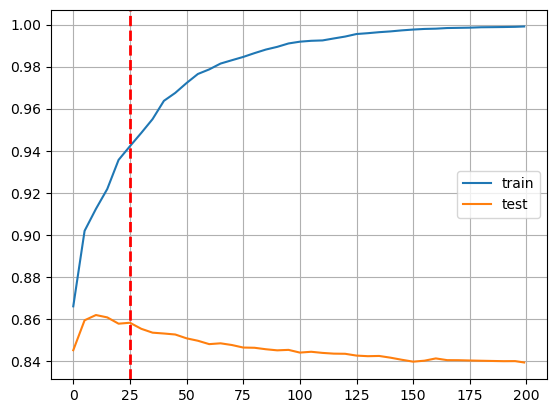

In [197]:
plt.plot(df_score.num_iter,df_score.train_auc,label="train")
plt.plot(df_score.num_iter,df_score.test_auc,label="test")
plt.axvline(x=25,color='red',linestyle='--',linewidth=2)
plt.grid(True)
plt.legend()


# **6.choosing the model**

In [ ]:
# Get the best trial from Optuna
best_trial = study.best_trial
print("Best trial number:", best_trial.number)
print("Best AUC:", best_trial.value)
print("Best params:", best_trial.params)




Best trial number: 13
Best AUC: 0.8344698619258651
Best params: {'booster': 'gblinear', 'lambda': 0.0008032800731077418, 'alpha': 2.5784390679290415e-06}


In [ ]:

client = mlflow.tracking.MlflowClient()
experiment_id = experiment_id 
runs = client.search_runs(experiment_ids=[experiment_id])

summary = []
for r in runs:
    summary.append({
        "run_id": r.info.run_id,
        "run_name": r.data.tags.get("mlflow.runName"),
        "val_auc": r.data.metrics.get("test_auc"),
        "params": r.data.params,
        "model_artifact":r.info.artifact_uri
    })

import pandas as pd
df_summary = pd.DataFrame(summary)
df_summary.sort_values("val_auc", ascending=False, inplace=True)
df_summary=df_summary.reset_index(drop=True)


In [ ]:
df_summary.head()

,run_id,run_name,val_auc,params,model_artifact
0,8e81b8b22d284eda9b617c5e87aa6434,trial_0_random_forest,0.864719,"{'clf__max_depth': '8', 'clf__min_samples_spli...",file:///Users/ayalemzouri/Desktop/Extraculicul...
1,3adc946366144197b06e3feb2338771e,logistic_model,0.861851,"{'clf__max_iter': '885', 'train_dataset': ' ...",file:///Users/ayalemzouri/Desktop/Extraculicul...
2,c0361432e63a4c68b42296fba4ea449f,Trial_13_gblinear_maxdepthNA,0.834470,"{'booster': 'gblinear', 'objective': 'binary:l...",file:///Users/ayalemzouri/Desktop/Extraculicul...
3,9081608245ce4150a0bc5e0e15ea9218,Trial_27_gblinear_maxdepthNA,0.834227,"{'booster': 'gblinear', 'objective': 'binary:l...",file:///Users/ayalemzouri/Desktop/Extraculicul...
4,9649f7c89b0a47d7b48d03ac1ab6ce21,Trial_21_gblinear_maxdepthNA,0.834188,"{'booster': 'gblinear', 'objective': 'binary:l...",file:///Users/ayalemzouri/Desktop/Extraculicul...


In [ ]:
best_run = df_summary.iloc[0]
best_run_id = best_run["run_id"]

In [ ]:
best_model_uri = f"runs:/{best_run_id}/random_forest_model"
best_rf = mlflow.sklearn.load_model(best_model_uri)


In [ ]:
y_pred=best_rf.predict_proba(X_test.to_dict(orient='records'))[:,1]
print(f"test score:{roc_auc_score(y_test,y_pred)}")

test score:0.8647186539277693


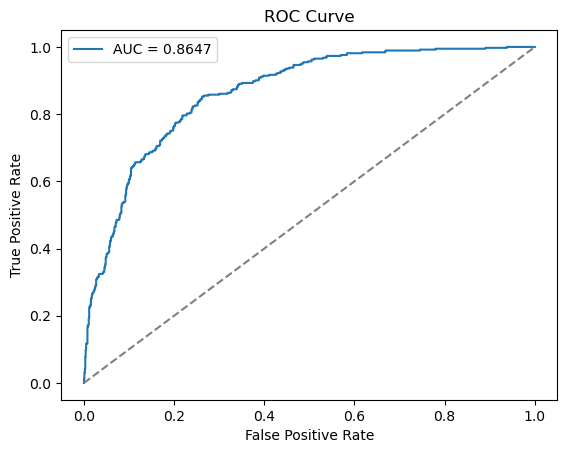

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test,y_pred):.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [199]:
import pickle

with open("best_model.pkl","wb") as f:
    pickle.dump(best_rf,f)

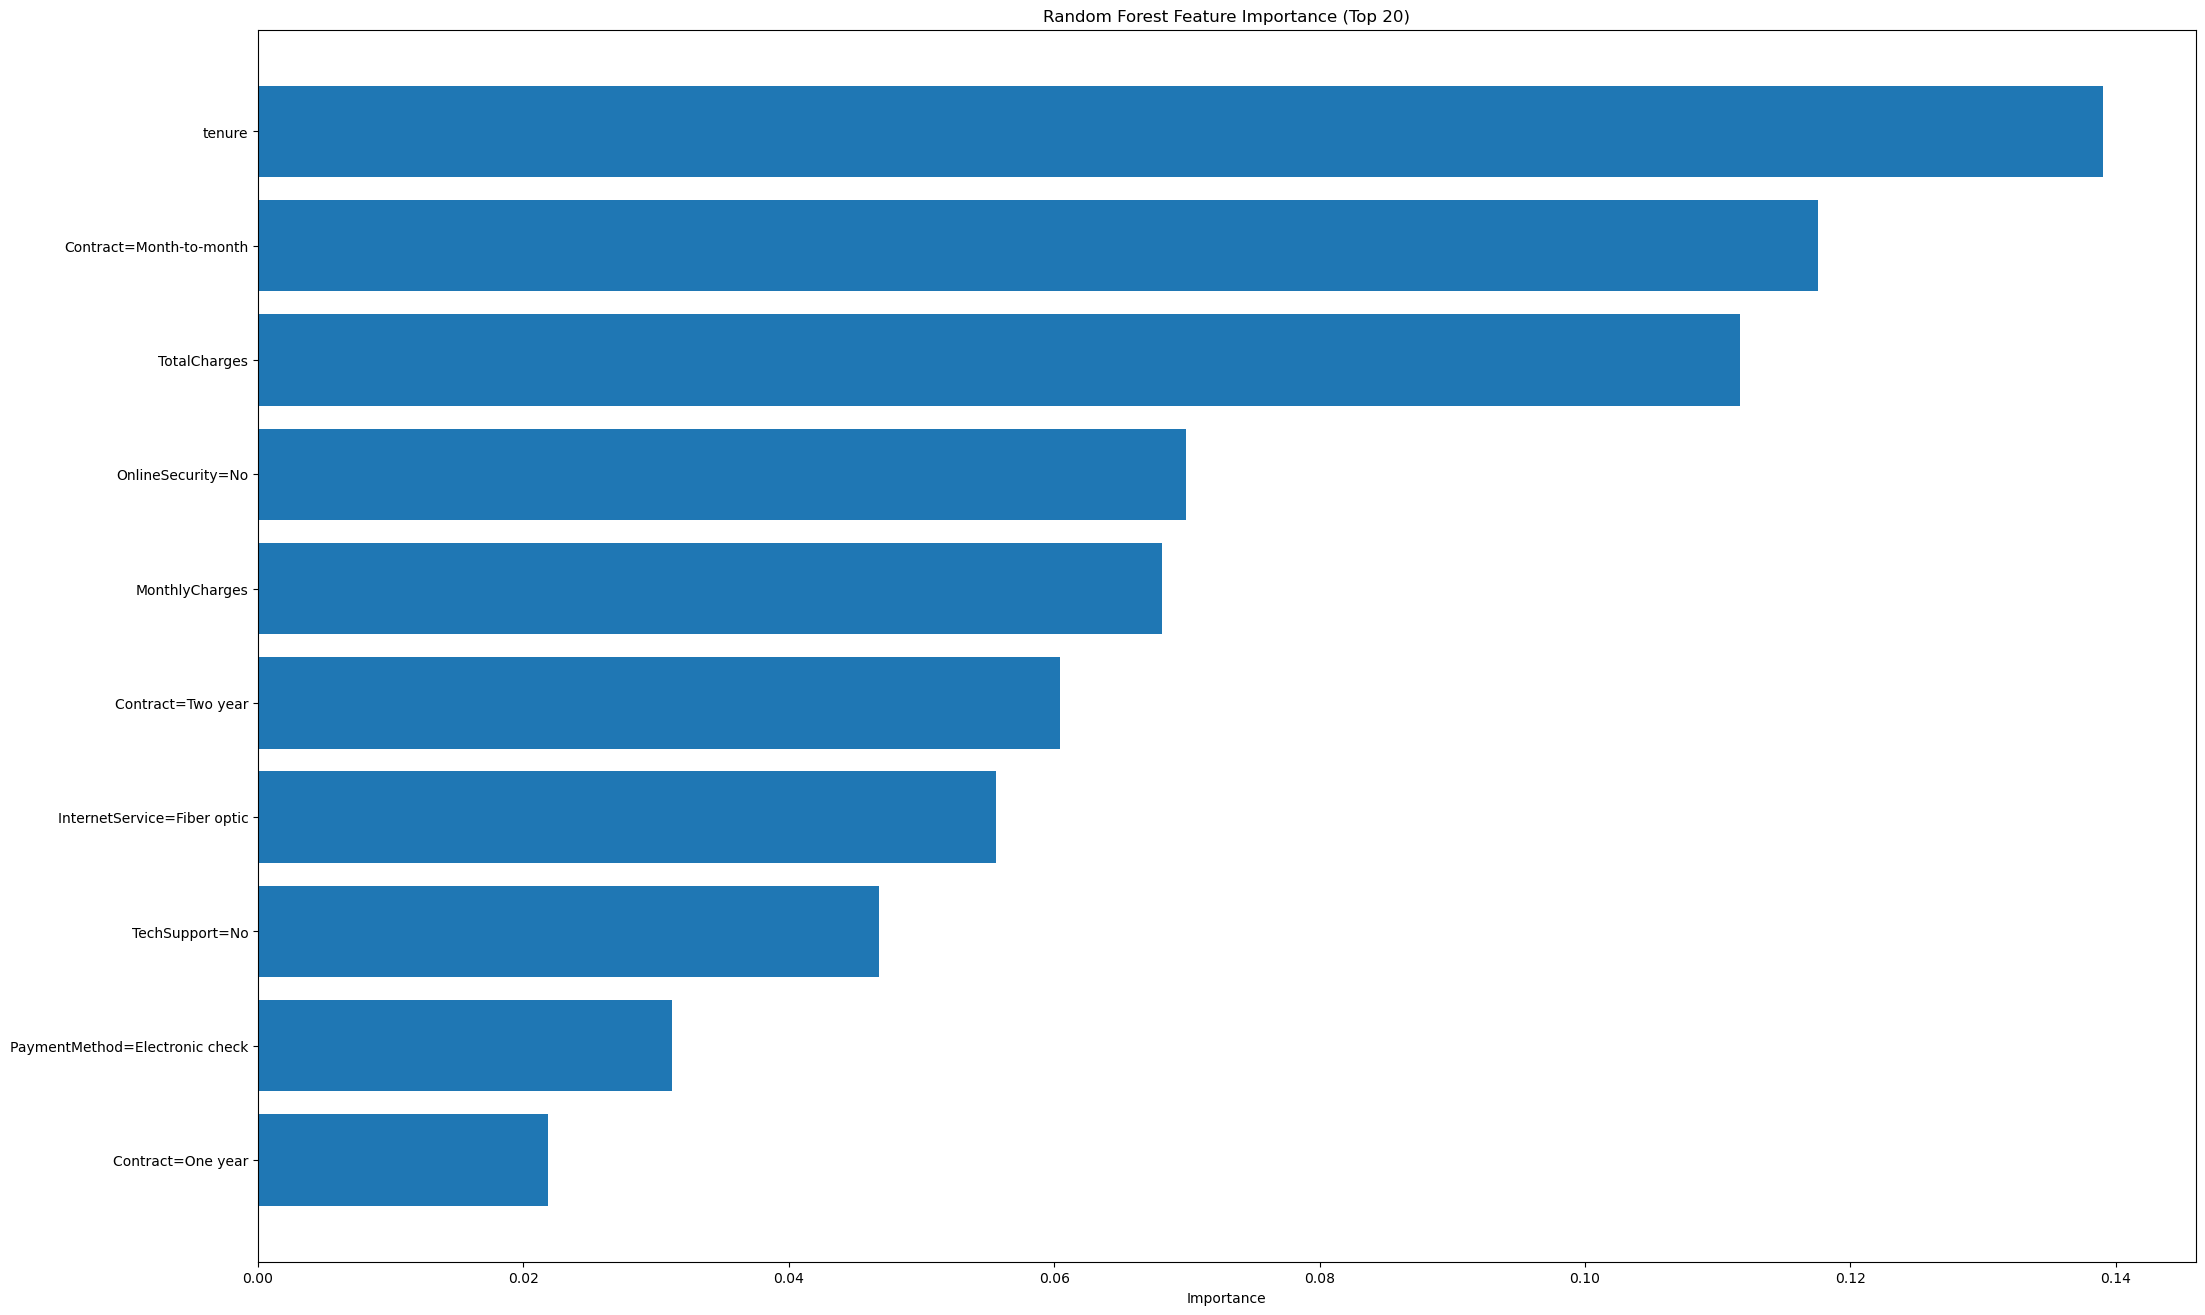

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = best_rf.named_steps['dv'].get_feature_names_out() 
importances = best_rf.named_steps['clf'].feature_importances_
feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(25,16))
plt.barh(feat_df['feature'][:10][::-1], feat_df['importance'][:10][::-1])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance (Top 20)")
plt.show()
